# Chapter 6
## Data cleaning, Imbalanced Data, and Other Data Problems
This notebook is a companion to the book _XGBoost for Regression Predictive Modeling and Time Series Analysis_.
This chapter covers how to address common problems with real-life data sets and this code is a series of Python data cleaning functions.

In [ ]:
# ----------------------------------------
# filename datacleaning.ipynb
# Python functions to perform common data cleaning tasks
# author Joyce Weiner
# revision 1.0
# revision history 1.0 - initial script
# ----------------------------------------

# These functions all use pandas
import pandas as pd
import numpy as np

In [ ]:
# Create a test dataframe to use to verify the functions work correctly
testdf = pd.DataFrame(np.random.randn(5250,3), columns=list("ABC"))
testdf["category"] = "Category A"
testdf.loc[3000:4499,["category"]] = "CategoryB"  # Use .loc for slice assignment
testdf.loc[4500:5250,["category"]] = "Cat C"  # Use .loc for slice assignment
testdf["Date"] = np.random.choice(pd.date_range('2022-10-01', '2023-10-31'), len(testdf))


In [ ]:
print(testdf)

             A         B         C    category       Date
0    -1.255925  0.170053 -0.463536  Category A 2023-10-02
1    -1.854306  0.745288 -2.279439  Category A 2022-10-22
2    -1.724005  0.178012  0.656322  Category A 2023-10-24
3     0.014901  0.206583  0.071068  Category A 2022-10-27
4     0.444339  1.269914  0.500067  Category A 2023-06-03
...        ...       ...       ...         ...        ...
5245  0.866440 -0.352794 -0.379468       Cat C 2023-03-20
5246 -0.601596  0.074194  0.323426       Cat C 2023-04-30
5247 -0.912827  0.565430  0.202656       Cat C 2022-12-03
5248 -1.785859  0.349455  0.717630       Cat C 2023-04-12
5249 -0.939593 -0.457014 -0.166299       Cat C 2023-09-23

[5250 rows x 5 columns]


## Example of multimodal data using the Iris dataset

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# load the iris data set from scikit-learn
from sklearn import datasets

irisarray = datasets.load_iris()# bring the array into a pandas dataframe and label the headers
# have to concatenate the data and the target -- which is already converted from words to numbers
irisdata = pd.DataFrame(np.c_[irisarray['data'], irisarray['target']], columns = irisarray['feature_names'] + ['Species'])
irisdata['Species'] = irisdata['Species'].astype(int)

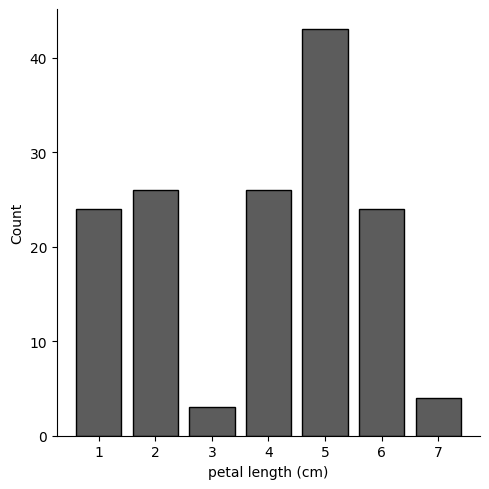

In [ ]:
sns.set_palette("dark:grey")
sns.displot(irisdata, x="petal length (cm)", discrete = True, shrink =0.8)

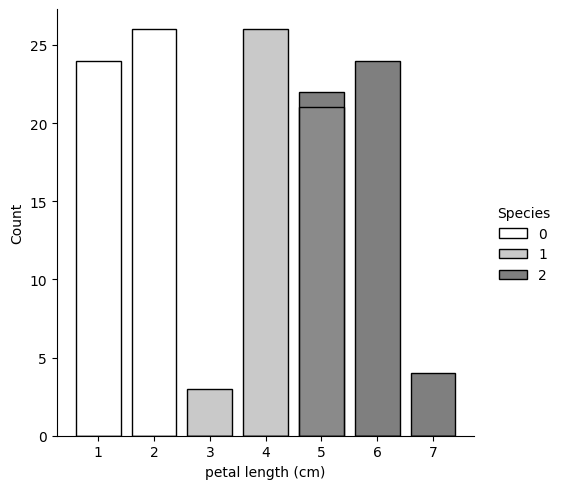

In [ ]:
sns.displot(irisdata, x="petal length (cm)", discrete = True, hue = "Species", shrink =0.8, palette = "Greys")

### 4-pseudo sigma filter for continuous data

In [ ]:
# Filter continuous data using a 4 pseudo sigma filter
# dataframe = pandas dataframe to modify
# parameter = name of column in dataframe to filter

def pseudosigmafilter(dataframe, parameter):
    mean = dataframe[parameter].mean()
    stdev = dataframe[parameter].std()
    lowerfiltervalue = mean - (4*stdev)
    upperfiltervalue = mean + (4*stdev)
    # print(mean)
    # print(stdev)
    # print(lowerfiltervalue)
    # print(upperfiltervalue)

    # Create a new column called "filter_" parameter and set to NaN if outside the limits
    dataframe["filter_" + parameter] = np.where(((dataframe[parameter] > lowerfiltervalue) & (dataframe[parameter] < upperfiltervalue)) , dataframe[parameter], np.NaN)
    return dataframe

In [ ]:
# Inject a huge value in Category A and test that it is filtered
testdf.at[0,"A"] = 11

pseudosigmafilter (testdf, "A")

,A,B,C,category,Date,filter_A
0,11.000000,0.170053,-0.463536,Category A,2023-10-02,NaN
1,-1.854306,0.745288,-2.279439,Category A,2022-10-22,-1.854306
2,-1.724005,0.178012,0.656322,Category A,2023-10-24,-1.724005
3,0.014901,0.206583,0.071068,Category A,2022-10-27,0.014901
4,0.444339,1.269914,0.500067,Category A,2023-06-03,0.444339
...,...,...,...,...,...,...
5245,0.866440,-0.352794,-0.379468,Cat C,2023-03-20,0.866440
5246,-0.601596,0.074194,0.323426,Cat C,2023-04-30,-0.601596
5247,-0.912827,0.565430,0.202656,Cat C,2022-12-03,-0.912827
5248,-1.785859,0.349455,0.717630,Cat C,2023-04-12,-1.785859


### Standardizing continuous data

In [ ]:
from sklearn import preprocessing
continuous = testdf[["A", "B", "C"]]
continuous.head()


,A,B,C
0,11.000000,0.170053,-0.463536
1,-1.854306,0.745288,-2.279439
2,-1.724005,0.178012,0.656322
3,0.014901,0.206583,0.071068
4,0.444339,1.269914,0.500067


In [ ]:
standardized = preprocessing.StandardScaler().fit(continuous)

In [ ]:
standardized = standardized.transform(continuous)
print (standardized)

[[10.88402684  0.16005257 -0.45409408]
 [-1.82885247  0.72732722 -2.27795039]
 [-1.69998456  0.16790143  0.6706686 ]
 ...
 [-0.89773132  0.5499582   0.21501536]
 [-1.76115784  0.33697215  0.73224455]
 [-0.92420269 -0.45833578 -0.15555529]]


In [ ]:
standardizeddf = pd.DataFrame(standardized, columns=["A", "B", "C"] )
standardizeddf.head()

,A,B,C
0,10.884027,0.160053,-0.454094
1,-1.828852,0.727327,-2.277950
2,-1.699985,0.167901,0.670669
3,0.019789,0.196077,0.082851
4,0.444502,1.244693,0.513730


In [ ]:
standardizedtestdf = pd.concat([testdf, standardizeddf],axis=1)
standardizedtestdf.head()

,A,B,C,category,Date,filter_A,A,B,C
0,11.000000,0.170053,-0.463536,Category A,2023-10-02,NaN,10.884027,0.160053,-0.454094
1,-1.854306,0.745288,-2.279439,Category A,2022-10-22,-1.854306,-1.828852,0.727327,-2.277950
2,-1.724005,0.178012,0.656322,Category A,2023-10-24,-1.724005,-1.699985,0.167901,0.670669
3,0.014901,0.206583,0.071068,Category A,2022-10-27,0.014901,0.019789,0.196077,0.082851
4,0.444339,1.269914,0.500067,Category A,2023-06-03,0.444339,0.444502,1.244693,0.513730


#### Centering data

In [ ]:
centered = preprocessing.StandardScaler(with_std=False).fit(continuous)
print(centered.transform(continuous))

[[11.00510838  0.16229868 -0.45211389]
 [-1.8491979   0.73753422 -2.26801685]
 [-1.71889637  0.17025769  0.66774399]
 ...
 [-0.90771831  0.55767608  0.21407773]
 [-1.7807502   0.34170108  0.72905142]
 [-0.93448417 -0.46476787 -0.15487696]]


### Normalizing continuous data

In [ ]:
from sklearn import preprocessing
def normalizecolumn(dataframe, parameter):
    colarray = np.array(dataframe[parameter])
    normalizedarray = preprocessing.normalize([colarray]).tolist()
    normalizedarray = np.swapaxes(normalizedarray,0,1)
    dataframe["normalized_" + parameter] = normalizedarray
    return dataframe

In [ ]:
normalizecolumn(testdf, "B")

,A,B,C,category,Date,filter_A,normalized_B
0,11.000000,0.170053,-0.463536,Category A,2023-10-02,NaN,0.002314
1,-1.854306,0.745288,-2.279439,Category A,2022-10-22,-1.854306,0.010143
2,-1.724005,0.178012,0.656322,Category A,2023-10-24,-1.724005,0.002423
3,0.014901,0.206583,0.071068,Category A,2022-10-27,0.014901,0.002812
4,0.444339,1.269914,0.500067,Category A,2023-06-03,0.444339,0.017283
...,...,...,...,...,...,...,...
5245,0.866440,-0.352794,-0.379468,Cat C,2023-03-20,0.866440,-0.004802
5246,-0.601596,0.074194,0.323426,Cat C,2023-04-30,-0.601596,0.001010
5247,-0.912827,0.565430,0.202656,Cat C,2022-12-03,-0.912827,0.007695
5248,-1.785859,0.349455,0.717630,Cat C,2023-04-12,-1.785859,0.004756


### Correcting spelling in a column

In [ ]:
def cleancategory(dataframe, parameter):
    if parameter == "category":
        dataframe["clean_" + parameter] = "Category " + dataframe[parameter].str[-1]
    return dataframe

In [ ]:
cleancategory(testdf, "category" )

,A,B,C,category,Date,filter_A,normalized_B,clean_category
0,11.000000,0.170053,-0.463536,Category A,2023-10-02,NaN,0.002314,Category A
1,-1.854306,0.745288,-2.279439,Category A,2022-10-22,-1.854306,0.010143,Category A
2,-1.724005,0.178012,0.656322,Category A,2023-10-24,-1.724005,0.002423,Category A
3,0.014901,0.206583,0.071068,Category A,2022-10-27,0.014901,0.002812,Category A
4,0.444339,1.269914,0.500067,Category A,2023-06-03,0.444339,0.017283,Category A
...,...,...,...,...,...,...,...,...
5245,0.866440,-0.352794,-0.379468,Cat C,2023-03-20,0.866440,-0.004802,Category C
5246,-0.601596,0.074194,0.323426,Cat C,2023-04-30,-0.601596,0.001010,Category C
5247,-0.912827,0.565430,0.202656,Cat C,2022-12-03,-0.912827,0.007695,Category C
5248,-1.785859,0.349455,0.717630,Cat C,2023-04-12,-1.785859,0.004756,Category C


### Reformatting date data

In [ ]:
testdf["Date_new"] = testdf["Date"].dt.strftime("%d-%b-%Y")
testdf.head()

,A,B,C,category,Date,filter_A,normalized_B,clean_category,Date_new
0,11.000000,0.170053,-0.463536,Category A,2023-10-02,NaN,0.002314,Category A,02-Oct-2023
1,-1.854306,0.745288,-2.279439,Category A,2022-10-22,-1.854306,0.010143,Category A,22-Oct-2022
2,-1.724005,0.178012,0.656322,Category A,2023-10-24,-1.724005,0.002423,Category A,24-Oct-2023
3,0.014901,0.206583,0.071068,Category A,2022-10-27,0.014901,0.002812,Category A,27-Oct-2022
4,0.444339,1.269914,0.500067,Category A,2023-06-03,0.444339,0.017283,Category A,03-Jun-2023


In [ ]:
testdf["Date_US"] = testdf["Date"].dt.strftime("%m/%d/%Y")
testdf.head()

,A,B,C,category,Date,filter_A,normalized_B,clean_category,Date_new,Date_US
0,11.000000,0.170053,-0.463536,Category A,2023-10-02,NaN,0.002314,Category A,02-Oct-2023,10/02/2023
1,-1.854306,0.745288,-2.279439,Category A,2022-10-22,-1.854306,0.010143,Category A,22-Oct-2022,10/22/2022
2,-1.724005,0.178012,0.656322,Category A,2023-10-24,-1.724005,0.002423,Category A,24-Oct-2023,10/24/2023
3,0.014901,0.206583,0.071068,Category A,2022-10-27,0.014901,0.002812,Category A,27-Oct-2022,10/27/2022
4,0.444339,1.269914,0.500067,Category A,2023-06-03,0.444339,0.017283,Category A,03-Jun-2023,06/03/2023


### Sampling data for each class to match the class with the smallest number of observations

In [ ]:
# Use pandas to select a random sample by category
# dataframe = pandas dataframe to modify
# category = name of column in dataframe
# nsamples = number of rows

def subsamplecategory(olddataframe,category,nsamples):
    newdataframe = olddataframe.groupby(category).apply(lambda s: s.sample(nsamples))
    return newdataframe

In [ ]:
newdf = subsamplecategory(testdf,"category",750)
print (newdf)

                       A         B         C   category       Date  filter_A  \
category                                                                       
Cat C     5069  0.408563  2.260384  0.794987      Cat C 2023-03-31  0.408563   
          5032  1.029108  0.399066 -0.949018      Cat C 2023-08-26  1.029108   
          4667 -0.000852  0.821895  0.090957      Cat C 2023-08-23 -0.000852   
          4772 -0.257465  0.059673  1.635402      Cat C 2023-06-09 -0.257465   
          4551  0.390915  0.904675  0.649822      Cat C 2022-12-05  0.390915   
...                  ...       ...       ...        ...        ...       ...   
CategoryB 3807 -1.908800 -1.089226 -0.139249  CategoryB 2023-10-28 -1.908800   
          4456 -1.386182  0.689771 -0.482572  CategoryB 2023-05-15 -1.386182   
          3962  0.972650 -1.299143  0.873698  CategoryB 2023-06-07  0.972650   
          4408  0.735656 -1.057226  3.086878  CategoryB 2023-10-23  0.735656   
          3129 -0.196386  1.805623 -0.26

<ipython-input-21-014c61833303>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  newdataframe = olddataframe.groupby(category).apply(lambda s: s.sample(nsamples))
